# Worksheet 04a: Tidy Data & The Model-Fitting Paradigm in R
_Diana Lin_

This is the corresponding worksheet for Class 8 (Oct 6, 2020) & Class 9 (Oct 8, 2020).

For marking purposes, we will need the packages below. Remember to pay attention to the variable name to store your answer in, or else it will not be autograded correctly.

In [1]:
library(testthat)
library(digest)

## TOPIC 1: Tidy Data

To do our pivoting, we will be using the `tidyverse` package and the following datasets. `broom` will be used later for model-fitting.

In [2]:
library(tidyverse)
library(broom)
library(gapminder)
lotr  <- suppressMessages(read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/lotr_tidy.csv"))
guest <- suppressMessages(read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/wedding/attend.csv"))
email <- suppressMessages(read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/wedding/emails.csv"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



## Question 1: Univariate Pivoting

Consider the Lord of the Rings data:

In [3]:
lotr

Film,Race,Gender,Words
<chr>,<chr>,<chr>,<dbl>
The Fellowship Of The Ring,Elf,Female,1229
The Fellowship Of The Ring,Hobbit,Female,14
The Fellowship Of The Ring,Man,Female,0
The Two Towers,Elf,Female,331
The Two Towers,Hobbit,Female,0
The Two Towers,Man,Female,401
The Return Of The King,Elf,Female,183
The Return Of The King,Hobbit,Female,2
The Return Of The King,Man,Female,268


### Question 1.1
Widen the data so that we see the words spoken by each race, by puttting race as its own column. Store this data frame in variable `lotr_wide`.

In [4]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(lotr_wide <- lotr %>%
    pivot_wider(id_cols = c(-Race, -Words), 
                names_from = Race,
                values_from = Words))
### END SOLUTION

Film,Gender,Elf,Hobbit,Man
<chr>,<chr>,<dbl>,<dbl>,<dbl>
The Fellowship Of The Ring,Female,1229,14,0
The Two Towers,Female,331,0,401
The Return Of The King,Female,183,2,268
The Fellowship Of The Ring,Male,971,3644,1995
The Two Towers,Male,513,2463,3589
The Return Of The King,Male,510,2673,2459


In [5]:
test_that("Question 1.1", {expect_equal(digest(lotr_wide), "0ab029817c5e0d9e40be607969f6f006")})
print("Correct!")

[1] "Correct!"


### Question 1.2
Re-lengthen the wide `lotr` data from Question 1.2 above. Store this data frame in the variable `lotr_long`.

**Hint:** the resulting data frame should appear to be the same as the original!

In [6]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(lotr_long <- lotr_wide %>% 
  pivot_longer(cols = c(-Film, -Gender), 
               names_to  = "Race", 
               values_to = "Words"))
### END SOLUTION

Film,Gender,Race,Words
<chr>,<chr>,<chr>,<dbl>
The Fellowship Of The Ring,Female,Elf,1229
The Fellowship Of The Ring,Female,Hobbit,14
The Fellowship Of The Ring,Female,Man,0
The Two Towers,Female,Elf,331
The Two Towers,Female,Hobbit,0
The Two Towers,Female,Man,401
The Return Of The King,Female,Elf,183
The Return Of The King,Female,Hobbit,2
The Return Of The King,Female,Man,268


In [7]:
test_that("Question 1.2", {expect_equal(digest(lotr_long), "c1449d8350e4ea2c2c4c64f0c083d289")})
print("Correct!")

[1] "Correct!"


## Question 2: Multivariate Pivoting
Congratulations, you’re getting married! In addition to the wedding, you’ve decided to hold two other events: a day-of brunch and a day-before round of golf. You’ve made a guestlist of attendance so far, along with food preference for the food events (wedding and brunch).

In [8]:
guest

party,name,meal_wedding,meal_brunch,attendance_wedding,attendance_brunch,attendance_golf
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,PENDING,PENDING,PENDING,PENDING,PENDING
1,Phillip Medrano,vegetarian,Menu C,CONFIRMED,CONFIRMED,CONFIRMED
1,Blanka Medrano,chicken,Menu A,CONFIRMED,CONFIRMED,CONFIRMED
1,Emaan Medrano,PENDING,PENDING,PENDING,PENDING,PENDING
2,Blair Park,chicken,Menu C,CONFIRMED,CONFIRMED,CONFIRMED
2,Nigel Webb,NA,NA,CANCELLED,CANCELLED,CANCELLED
3,Sinead English,PENDING,PENDING,PENDING,PENDING,PENDING
4,Ayra Marks,vegetarian,Menu B,PENDING,PENDING,PENDING
5,Atlanta Connolly,PENDING,PENDING,PENDING,PENDING,PENDING


### Question 2.1
Put `meal` and `attendance` as their own columns, with the events living in a new column. Store the resulting data frame in the variable `guest_long`.

In [9]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(guest_long <- guest %>% 
  pivot_longer(cols      = c(-party, -name), 
               names_to  = c(".value", "event"),
               names_sep = "_"))
### END SOLUTION

party,name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,wedding,PENDING,PENDING
1,Sommer Medrano,brunch,PENDING,PENDING
1,Sommer Medrano,golf,NA,PENDING
1,Phillip Medrano,wedding,vegetarian,CONFIRMED
1,Phillip Medrano,brunch,Menu C,CONFIRMED
1,Phillip Medrano,golf,NA,CONFIRMED
1,Blanka Medrano,wedding,chicken,CONFIRMED
1,Blanka Medrano,brunch,Menu A,CONFIRMED
1,Blanka Medrano,golf,NA,CONFIRMED


In [10]:
test_that("Question 2.1", {expect_equal(digest(guest_long), "2b09cd8a15b8f29324cff88eada854b4")})
print("Correct!")

[1] "Correct!"


### Question 2.2
Use `tidyr::separate()` to split the `name` in `guest_long` into two columns: `first_name` and `last_name`. Store this resulting dataframe into the variable `guest_sep`.

In [11]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(guest_sep <- guest_long %>% 
  separate(name, into = c("first_name", "last_name"), sep=" "))
### END SOLUTION

party,first_name,last_name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Sommer,Medrano,wedding,PENDING,PENDING
1,Sommer,Medrano,brunch,PENDING,PENDING
1,Sommer,Medrano,golf,NA,PENDING
1,Phillip,Medrano,wedding,vegetarian,CONFIRMED
1,Phillip,Medrano,brunch,Menu C,CONFIRMED
1,Phillip,Medrano,golf,NA,CONFIRMED
1,Blanka,Medrano,wedding,chicken,CONFIRMED
1,Blanka,Medrano,brunch,Menu A,CONFIRMED
1,Blanka,Medrano,golf,NA,CONFIRMED


In [12]:
test_that("Question 2.2", {expect_equal(digest(guest_sep), "3d56c82e213187c048d870d7f09a4ef1")})
print("Correct!")

[1] "Correct!"


### Question 2.3
Re-unite `first_name` and `last_name` in `guest_sep` back into `name` using `tidyr::unite()`. Store the resulting data frame in the variable `guest_unite`.

In [13]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(guest_unite <- guest_sep %>%
    unite(col = "name", c("first_name", "last_name"), sep = " "))
digest(guest_unite)
### END SOLUTION

party,name,event,meal,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Sommer Medrano,wedding,PENDING,PENDING
1,Sommer Medrano,brunch,PENDING,PENDING
1,Sommer Medrano,golf,NA,PENDING
1,Phillip Medrano,wedding,vegetarian,CONFIRMED
1,Phillip Medrano,brunch,Menu C,CONFIRMED
1,Phillip Medrano,golf,NA,CONFIRMED
1,Blanka Medrano,wedding,chicken,CONFIRMED
1,Blanka Medrano,brunch,Menu A,CONFIRMED
1,Blanka Medrano,golf,NA,CONFIRMED


[1] "2b09cd8a15b8f29324cff88eada854b4"

In [14]:
test_that("Question 2.3", {expect_equal(digest(guest_unite), "2b09cd8a15b8f29324cff88eada854b4")})
print("Correct!")

[1] "Correct!"


### Question 2.4
Which parties still have a "PENDING" status for all members and all events? Store the resulting _vector_ in `all_pending`.

**Hint**: use `guest_long` as a starting point.

In [15]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
all_pending <- (guest_long %>% 
    group_by(party) %>% 
    summarize(.groups = "keep", all_pending = all(attendance == "PENDING")) %>%
    filter(all_pending == TRUE))$party
### END SOLUTION

In [16]:
test_that("Question 2.4", {expect_equal(digest(all_pending),"f13a65bc5c8793a2cad1415aad7dff93")})
print("Correct!")

[1] "Correct!"


### Question 2.5
Which parties still have a “PENDING” status for all members for the wedding?

In [17]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
wedding_pending <- (guest %>% 
    group_by(party) %>% 
    summarize(.groups = "keep", pending_wedding = all(attendance_wedding == "PENDING")) %>%
    filter(pending_wedding == TRUE))$party
### END SOLUTION

In [18]:
test_that("Question 2.5", {expect_equal(digest(wedding_pending), "f13a65bc5c8793a2cad1415aad7dff93")})
print("Correct!")

[1] "Correct!"


### TOPIC 2: The Model-Fitting Paradigm in R¶
So you want to fit a model to your data. How can you achieve this with R?

Topics:

1. What _is_ model-fitting?
2. How do we fit a model in R?
3. How can we obtain tidy results from the model output?

### What is Model-Fitting?
When variables are not independent, then we can gain information about one variable if we know something about the other.

Examples: Use the scatterplot below:

1. A car weighs 4000 lbs. What can we say about its mpg?
2. A car weights less than 3000 lbs. What can we say about its mpg?

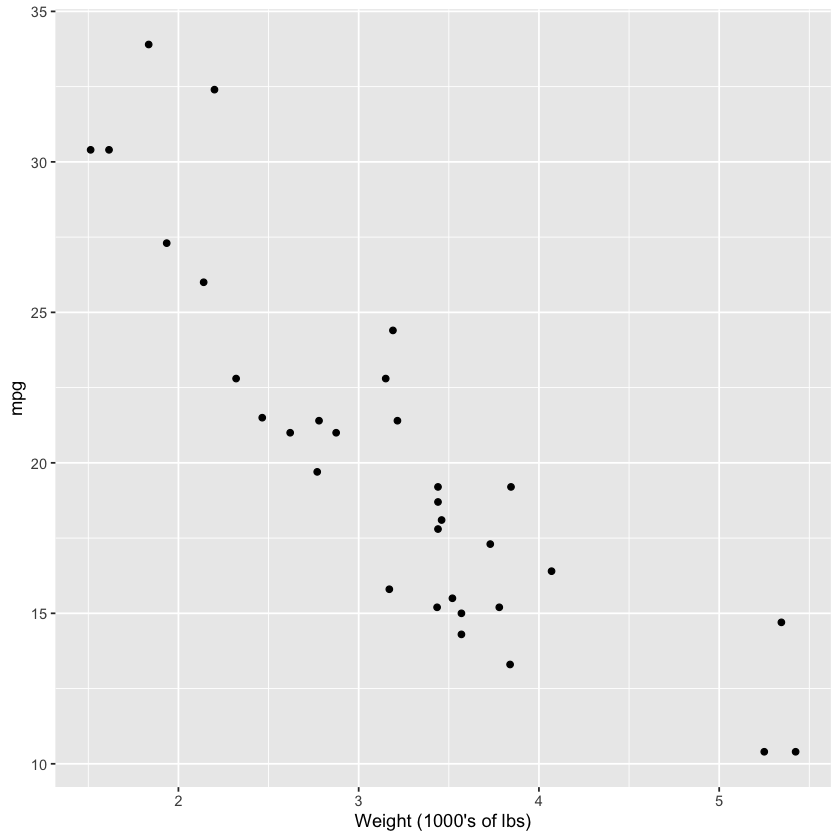

In [19]:
# models can fit many data points (using an 'averaged' data line is not always helpful)
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  labs(x = "Weight (1000's of lbs)")

Example: What can we say about rear axle ratio if we know something about quarter mile time?

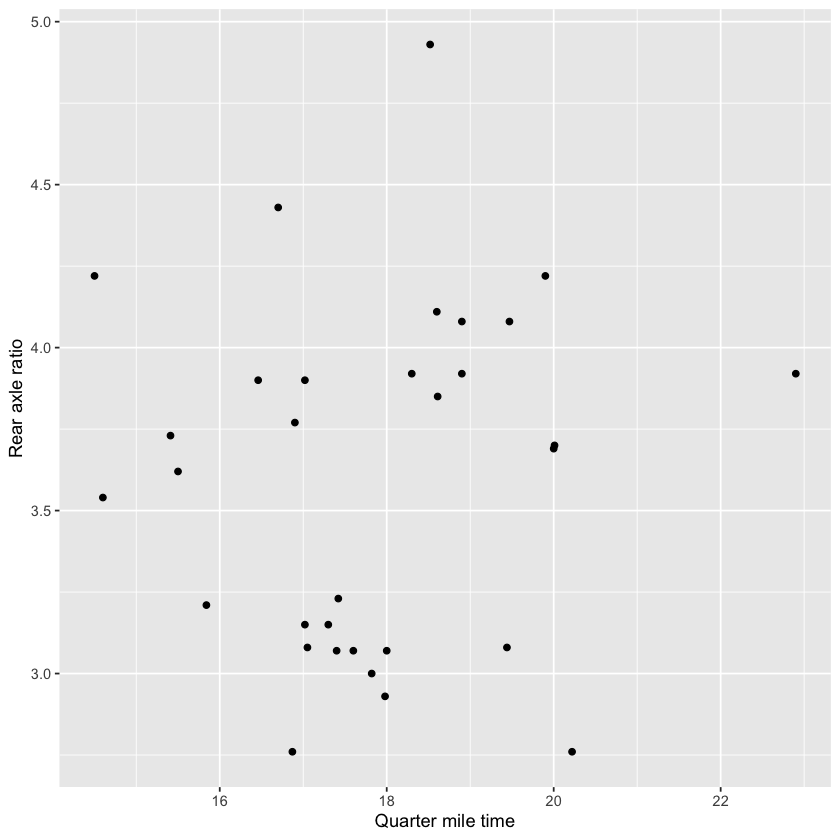

In [20]:
ggplot(mtcars, aes(qsec, drat)) + 
  geom_point() +
  labs(x = "Quarter mile time",
       y = "Rear axle ratio")

If EDA isn't enough, we can answer these questions by fitting a model: a curve that predicts Y given X. Aka, a __regression curve__ or a __machine learning model__. 

(There are more comprehensive models too, such as modelling entire distributions, but that's not what we're doing here)

There are typically two goals of fitting a model:

1. Make predictions.
2. Interpret variable relationships.

## Fitting a model in R

Model fitting methods tend to use a common format in R:

```
method(formula, data, options)
```

They also tend to have a common output: a special _list_. 

__Method__:

A function such as:

- Linear Regression: `lm`
- Generalized Linear Regression: `glm`
- Local regression: `loess`
- Quantile regression: `quantreg::rq`
- ...

__Formula__:

In R, takes the form `y ~ x1 + x2 + ... + xp` (use column names in your data frame).

__Data__: The data frame.

__Options__: Specific to the method.

## Question 3
Overview:
1. Fit a linear regression model to life expectancy ("Y") from year ("X") by filling in the formula. Notice what appears as the output.
2. On a new line, use the `unclass` function to uncover the object's true nature: a list. Note: it might be easier to use the `names` function to see what components are included in the list. 

### Question 3.1
First, create a subset of the `gapminder` dataset containing only the country of `France`. Store this subset in `gapminder_France`.

In [21]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
(gapminder_France <- gapminder %>%
   filter(country == "France"))
### END SOLUTION

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
France,Europe,1952,67.410,42459667,7029.809
France,Europe,1957,68.930,44310863,8662.835
France,Europe,1962,70.510,47124000,10560.486
France,Europe,1967,71.550,49569000,12999.918
France,Europe,1972,72.380,51732000,16107.192
France,Europe,1977,73.830,53165019,18292.635
France,Europe,1982,74.890,54433565,20293.897
France,Europe,1987,76.340,55630100,22066.442
France,Europe,1992,77.460,57374179,24703.796


In [22]:
test_that("Question 3.1", {expect_equal(digest(gapminder_France), "4a8b2a786430992911f85af8e58c967a")})
print("Correct!")

[1] "Correct!"


### Question 3.2

Now, using the `lm()` function we will create the linear model, stored in `my_lm`:

In [23]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
my_lm <- lm(lifeExp ~ year, gapminder_France)
### END SOLUTION

In [24]:
test_that("Question 3.2", {expect_equal(digest(my_lm), "2914b07202dbdb1f548570efa79cce46")})
print("Correct!")
my_lm

[1] "Correct!"



Call:
lm(formula = lifeExp ~ year, data = gapminder_France)

Coefficients:
(Intercept)         year  
  -397.7646       0.2385  


Does that mean that the life expectency at "year 0" was equal to -397.7646?!

### Question 3.3
We are interested in the modeling results around the modeling period which starts at year 1952. To get a meaniningful "interpretable" intercept we can use the `I()` function. Store it in `my_lm`.

In [25]:
# use I() to make intercept so "beginning" of our dataset is 1952 corresponding to '0' of the model
# this makes it so all the years are relative to our first year of 1952

# YOUR ANSWER HERE
### BEGIN SOLUTION
my_lm <- lm(lifeExp ~ I(year-1952), gapminder_France)
### END SOLUTION

In [26]:
test_that("Question 3.3", {expect_equal(digest(my_lm), "16f7951126a4ae7b80ecb94415ebf46a")})
print("Correct!")
my_lm

[1] "Correct!"



Call:
lm(formula = lifeExp ~ I(year - 1952), data = gapminder_France)

Coefficients:
   (Intercept)  I(year - 1952)  
       67.7901          0.2385  


### Question 3.4
Use the `unclass()` function to take a look at how the `lm()` object actually looks like. Store it in `unclass_lm`.

In [27]:
# YOUR ANSWER HERE
### BEGIN SOLUTION
unclass_lm <- unclass(my_lm)
### END SOLUTION

In [28]:
test_that("Question 3.4", {expect_equal(digest(unclass_lm), "c0f1de297d09ec45610c78fa934fafe5")})
print("Correct!")

[1] "Correct!"


However, to make things more complicated, some info is stored in _another_ list after applying the `summary` function:

In [29]:
summary(my_lm)


Call:
lm(formula = lifeExp ~ I(year - 1952), data = gapminder_France)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38013 -0.13894  0.01235  0.14295  0.33486 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    67.79013    0.11949  567.33  < 2e-16 ***
I(year - 1952)  0.23850    0.00368   64.81 1.86e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.22 on 10 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9974 
F-statistic:  4200 on 1 and 10 DF,  p-value: 1.863e-14


We can use the `predict()` function to make predictions from the model (default is to use fitting/training data). Here are the predictions:

In [30]:
# use predict() to predict for years that are within our year range but do not have explicit data points
(gapminder_France2 <- data.frame(year = seq(2000, 2005)))
predict(my_lm, newdata = gapminder_France2) %>%
  head()

year
<int>
2000
2001
2002
2003
2004
2005


1       2       3       4       5       6 
79.2382 79.4767 79.7152 79.9537 80.1922 80.4307

Or we can predict on a new dataset:

1        2 
317.7396 318.9321

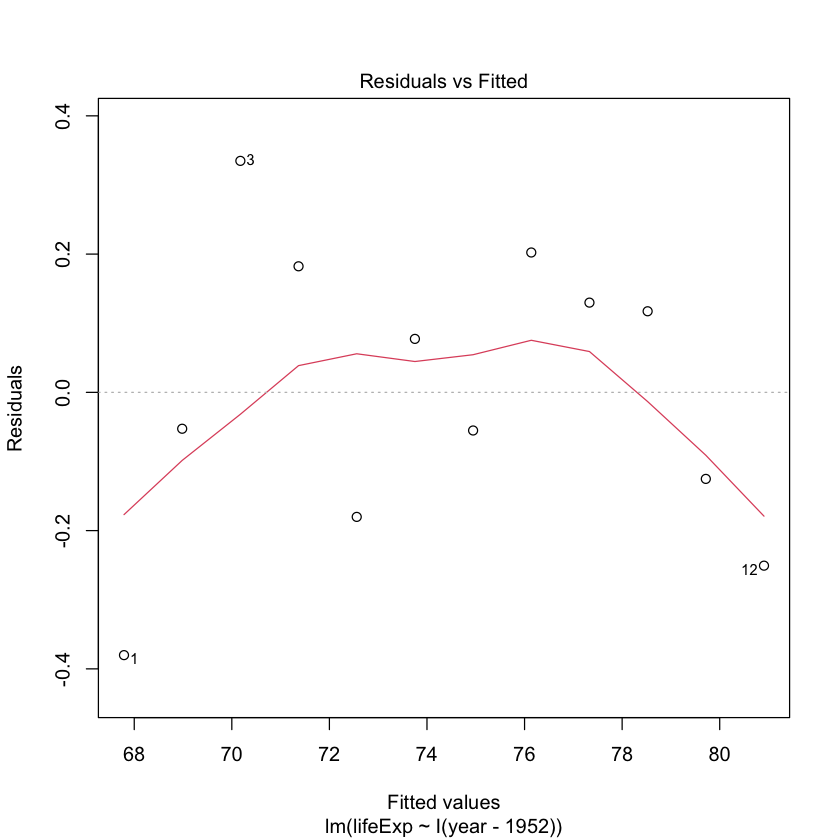

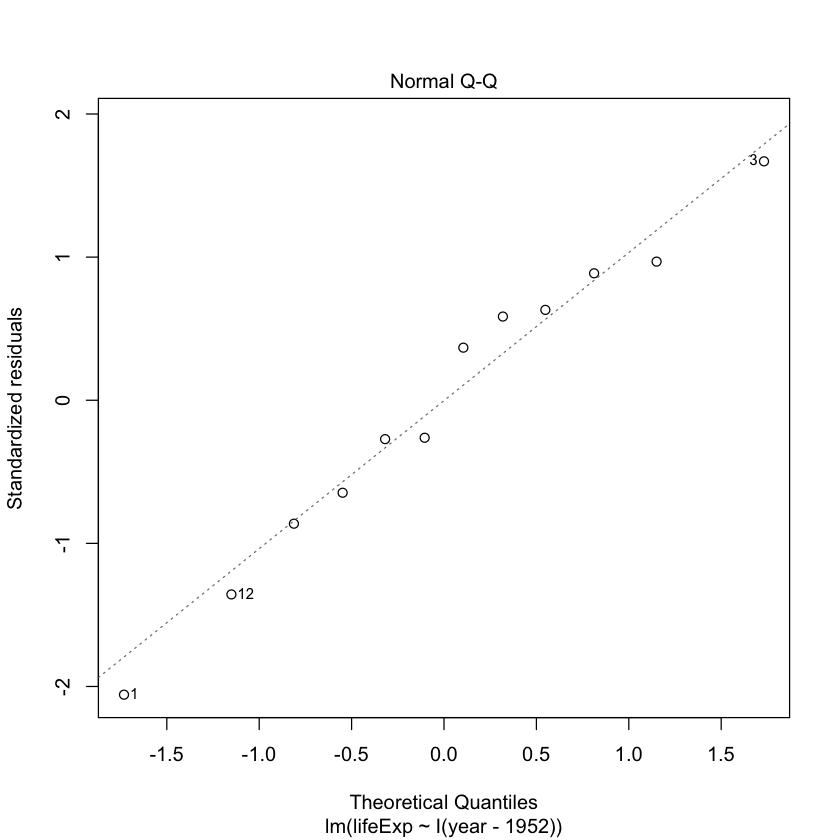

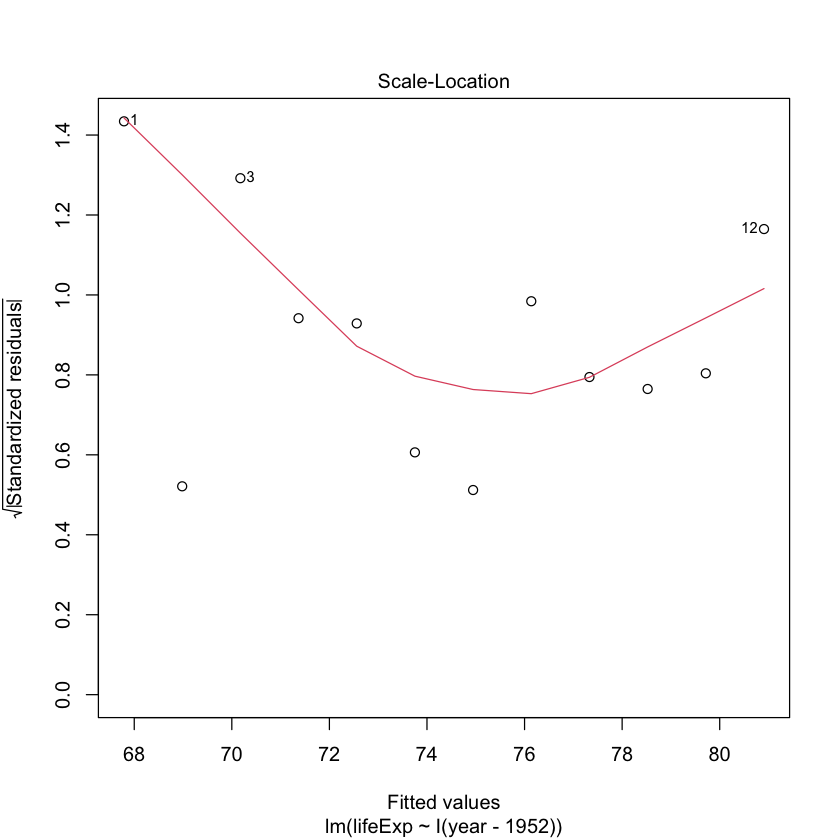

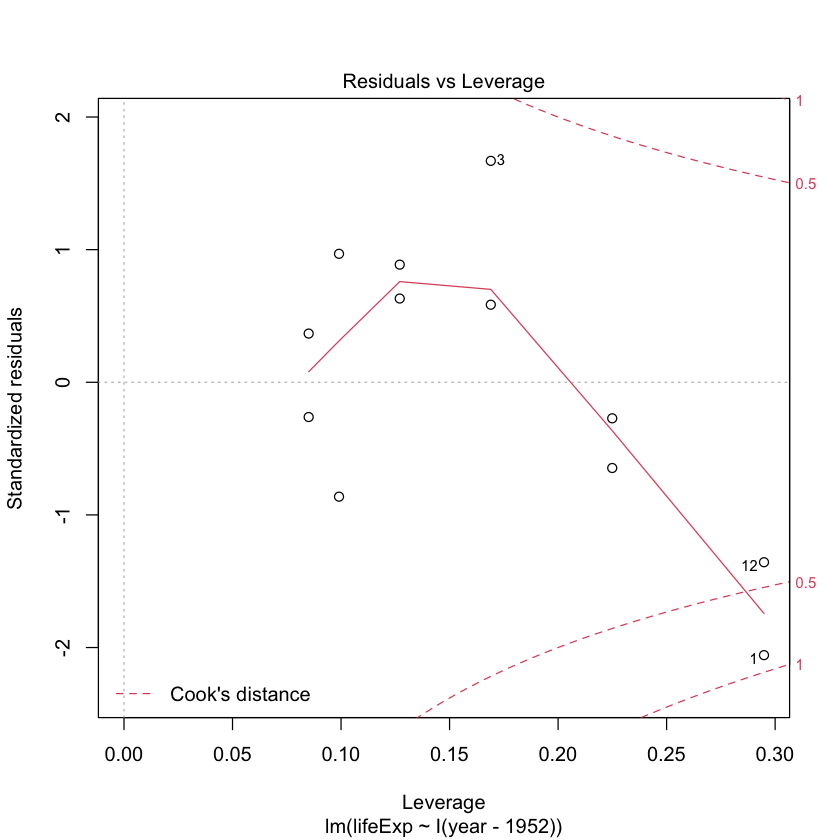

In [31]:
# or use predict() to predict for years that are beyond the range of our dataset
# that is, extrapolate data using the model
years1 = data.frame(year = c(3000, 3005))
predict(my_lm,years1)
plot(my_lm)

We can plot models (with one predictor/ X variable) using `ggplot2` through the `geom_smooth()` layer. Specifying `method="lm"` gives us the linear regression fit (but only visually!):

`geom_smooth()` using formula 'y ~ x'



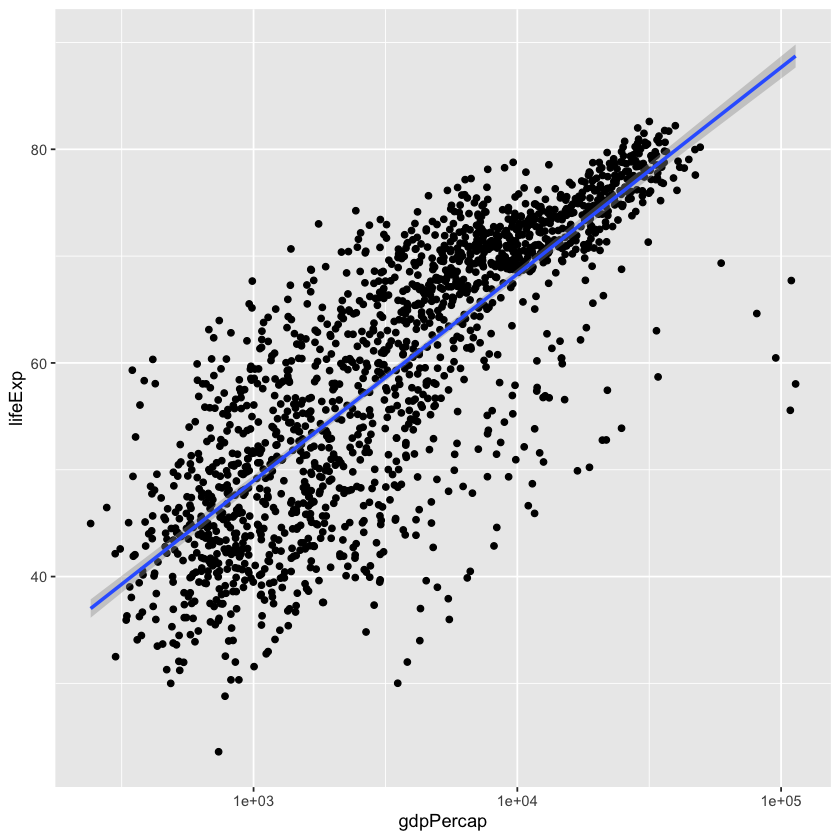

In [32]:
ggplot(gapminder, aes(gdpPercap, lifeExp)) +
    geom_point() +
    geom_smooth(method="lm") +
    scale_x_log10()

Let's consider another country "Zimbabwe", which has a unique behavior in the `lifeExp` and `year` relationship.

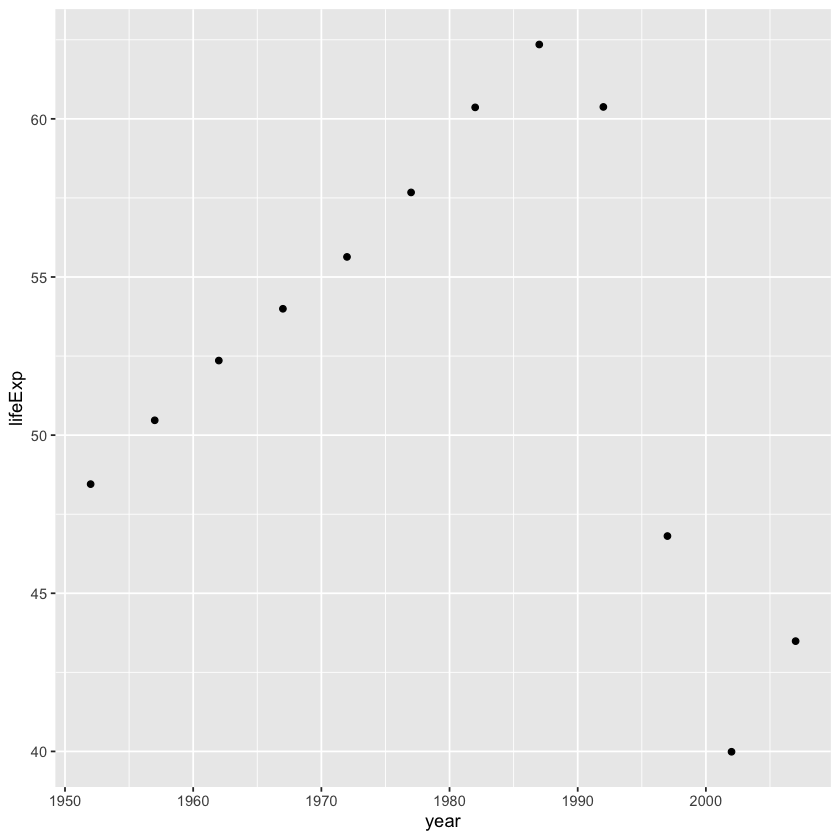

In [33]:
gapminder_Zimbabwe <- gapminder %>%
  filter(country == "Zimbabwe")

gapminder_Zimbabwe %>% 
  ggplot(aes(year, lifeExp)) +
  geom_point()

Let's try fitting a linear model to this relationship.

`geom_smooth()` using formula 'y ~ x'



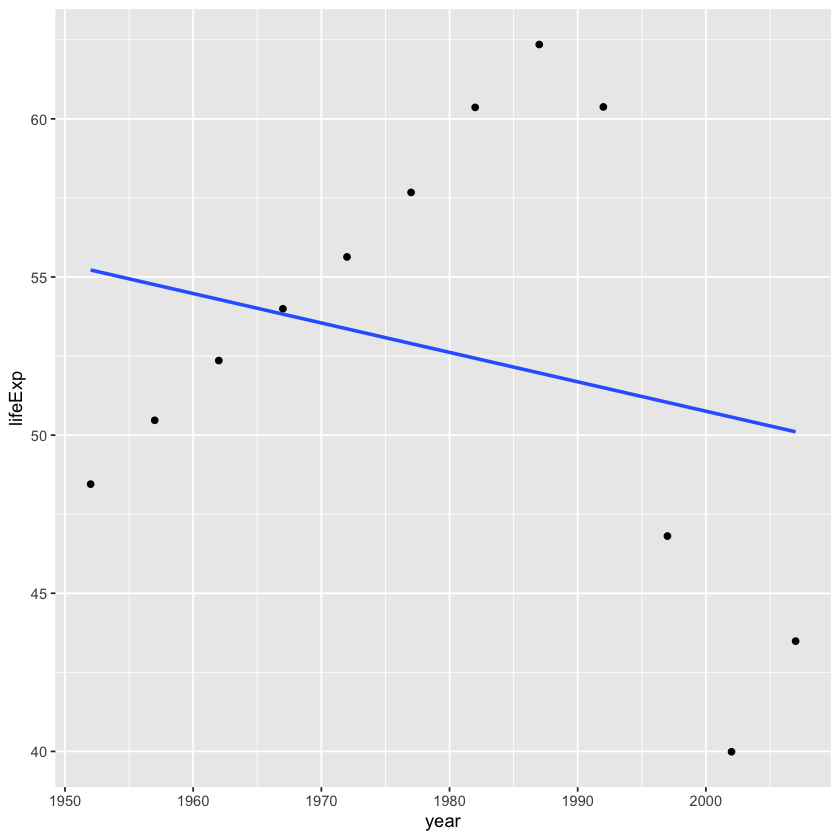

In [34]:
# se means show confidence interval, since false, will not show
ggplot(gapminder_Zimbabwe, aes(year,lifeExp)) +
  geom_point() +
  geom_smooth(method = "lm", se = F)

Now we will try to fit a second degree polynomial and see what would that look like.

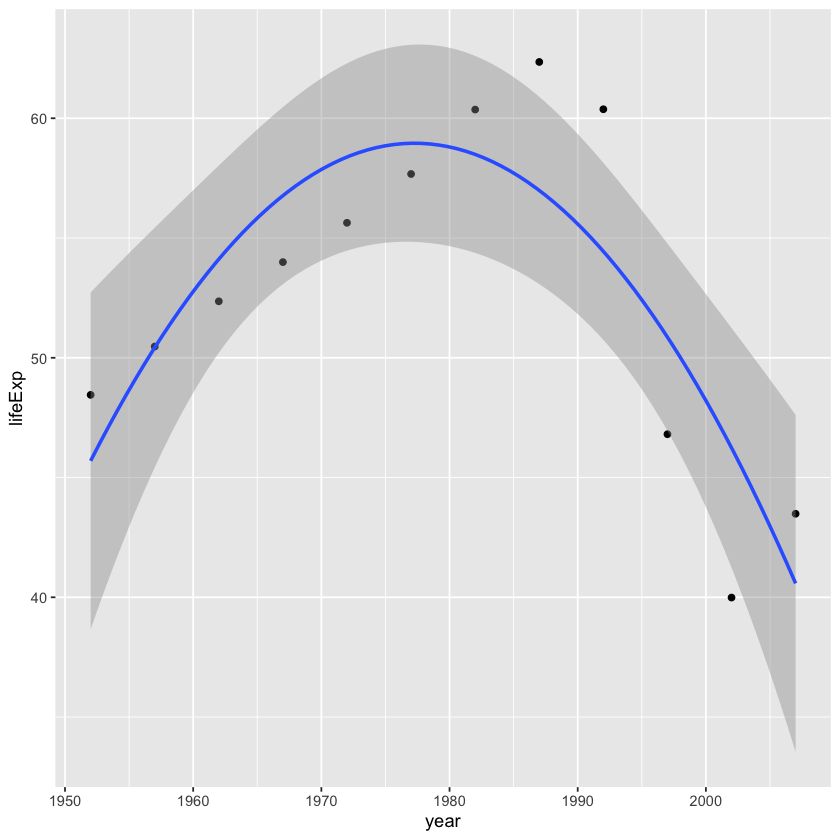

In [35]:
# second degree polynomial, using degree = 2, after formula
ggplot(gapminder_Zimbabwe, aes(year, lifeExp)) + 
  geom_point()+
  geom_smooth(method = "lm", formula = y ~ poly(I(x - 1952), degree = 2))

## Broom
Let's make it easier to extract info, using the `broom` package. There are three crown functions in this package, all of which input a fitted model, and outputs a tidy data frame.

1. `tidy`: extract statistical summaries about each component of the model.
    - Useful for _interpretation_ task.
2. `augment`: add columns to the original data frame, giving information corresponding to each row.
    - Useful for _prediction_ task.
3. `glance`: extract statistical summaries about the model as a whole (1-row tibble).
    - Useful for checking goodness of fit.
    
## Question 5
Overview:
 - Apply all three functions to our fitted model, `my_lm`
 
### Question 5.1
Apply `tidy()` to `my_lm`, and store it into `tidy_lm`.

In [36]:
# YOUR ANSWER HERE 
### BEGIN SOLUTION
tidy_lm <- tidy(my_lm)
### END SOLUTION

In [37]:
test_that("Question 5.1", {expect_equal(digest(tidy_lm), "695f3c8995408f0c9d3e531d50b7a319")})
print("Correct!")

[1] "Correct!"


The `tidy` function result:

In [38]:
tidy_lm

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),67.7901282,0.119490058,567.32861,7.123475e-24
I(year - 1952),0.2385014,0.003680248,64.80579,1.863068e-14


### Question 5.2
Apply `augment()` to `my_lm`, and store it into `augment_lm`.

In [39]:
# YOUR ANSWER HERE 
### BEGIN SOLUTION
augment_lm <- augment(my_lm)
### END SOLUTION

In [40]:
test_that("Question 5.2", {expect_equal(digest(augment_lm), "167823fc9e6e78a41259f90135f8ec95")})
print("Correct!")

[1] "Correct!"


The `augment` function result:

In [41]:
augment_lm

lifeExp,I(year - 1952),.fitted,.std.resid,.hat,.sigma,.cooksd
<dbl>,<I<dbl>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67.410,0,67.79013,-2.0572208,0.29487179,0.1761573,0.884905601
68.930,5,68.98264,-0.2717027,0.22494172,0.2310920,0.010712566
70.510,10,70.17514,1.6693375,0.16899767,0.1969978,0.283358854
71.550,15,71.36765,0.8869421,0.12703963,0.2226395,0.057240744
72.380,20,72.56016,-0.8625572,0.09906760,0.2231544,0.040905832
73.830,25,73.75266,0.3674346,0.08508159,0.2303787,0.006277450
74.890,30,74.94517,-0.2621187,0.08508159,0.2311516,0.003194619
76.340,35,76.13768,0.9686874,0.09906760,0.2207992,0.051591334
77.460,40,77.33018,0.6314156,0.12703963,0.2272790,0.029009837


### Question 5.3
Apply `glance()` to `my_lm`, and store it into `glance_lm`.

In [42]:
# YOUR ANSWER HERE 
### BEGIN SOLUTION
glance_lm <- glance(my_lm)
### END SOLUTION

In [43]:
test_that("Question 5.3", {expect_equal(digest(glance_lm), "469b403286dfd430923238913fa6041f")})
print("Correct!")

[1] "Correct!"


The `glance` function result:

In [44]:
glance_lm

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9976246,0.997387,0.2200468,4199.79,1.863068e-14,1,2.233645,1.532711,2.987431,0.4842062,10,12
